In [ ]:
# Agregação natural = Semelhança
# Heurística = Descoberta
# Clustering = Agrupamento

In [ ]:
# KDD
# CRISP-DM (apoio ao KDD) - Cross Industry Standard Process for Data Mining
# -> Compreensão do negócio
# -> Compresão dos dados
# -> Preparação dos dados
# -> Modelagem
# -> Avaliação
# -> Desenvolvimento

### Compreensão do negócio
Tipo: MarketPlace

Exemplo: Empresa de Varejo Online

Objetivo de Negócio: Aumentar as vendas através da personalização das ofertas e campanhas de marketing.

Questões:
Quais produtos são mais comprados juntos?
Quais clientes têm maior probabilidade de comprar novamente?
Quais produtos têm maior margem de lucro?

### Compreensão dos dados

Exemplo: Dados Históricos de Transações

Conjunto de Dados:
Clientes: cliente_id, nome, idade, gênero, localização

Produtos: produto_id, nome, categoria, preço, custo

Transações: transacao_id, cliente_id, produto_id, data_compra, quantidade, valor_total

Análise Inicial:

Verifique a distribuição de idade dos clientes.

Identifique as categorias de produtos mais populares.

Calcule o ticket médio por cliente.

### Preparação dos dados

Exemplo: Limpeza e Transformação

Passos:

Limpeza: Remover duplicatas e lidar com valores ausentes.

Transformação:

Normalizar os preços dos produtos.

Criar variáveis como margem_lucro (diferença entre preço e custo).

Criar uma variável data_mês a partir de data_compra.

In [ ]:
import pandas as pd

clientes = pd.DataFrame({
    'cliente_id': [1, 2, 3],
    'nome': ['Alice', 'Bob', 'Carol'],
    'idade': [25, 30, 35],
    'gênero': ['F', 'M', 'F'],
    'localização': ['SP', 'RJ', 'MG']
})

produtos = pd.DataFrame({
    'produto_id': [101, 102, 103],
    'nome': ['Produto A', 'Produto B', 'Produto C'],
    'categoria': ['Eletrônicos', 'Livros', 'Roupas'],
    'preço': [200, 30, 50],
    'custo': [150, 20, 30]
})

transacoes = pd.DataFrame({
    'transacao_id': [1001, 1002, 1003],
    'cliente_id': [1, 2, 1],
    'produto_id': [101, 102, 103],
    'data_compra': ['2023-01-01', '2023-02-15', '2023-03-05'],
    'quantidade': [1, 2, 1],
    'valor_total': [200, 60, 50]
})


produtos['margem_lucro'] = produtos['preço'] - produtos['custo']

print(clientes)
print(produtos)
print(transacoes)


   cliente_id   nome  idade gênero localização
0           1  Alice     25      F          SP
1           2    Bob     30      M          RJ
2           3  Carol     35      F          MG
   produto_id       nome    categoria  preço  custo  margem_lucro
0         101  Produto A  Eletrônicos    200    150            50
1         102  Produto B       Livros     30     20            10
2         103  Produto C       Roupas     50     30            20
   transacao_id  cliente_id  produto_id data_compra  quantidade  valor_total
0          1001           1         101  2023-01-01           1          200
1          1002           2         102  2023-02-15           2           60
2          1003           1         103  2023-03-05           1           50


### Modelagem
Exemplo: Clusterização de Clientes

Técnica: K-means Clustering

Objetivo: Agrupar clientes com comportamentos de compra similares para personalizar campanhas.

In [ ]:
from sklearn.cluster import KMeans

X = clientes[['idade']]

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
clientes['cluster'] = kmeans.labels_

print(clientes)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   cliente_id   nome  idade gênero localização  cluster
0           1  Alice     25      F          SP        1
1           2    Bob     30      M          RJ        0
2           3  Carol     35      F          MG        0


### Avaliação
Exemplo: Avaliação do Modelo de Classificação

Técnica: Matriz de Confusão

Objetivo: Avaliar a precisão de um modelo preditivo.

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1]
y_pred = [1, 0, 0]

cm = confusion_matrix(y_true, y_pred)

print(cm)


[[1 0]
 [1 1]]


### Desenvolvimento
Exemplo: Implementação do Modelo

Passos:

Implementar o modelo de clusterização no sistema de recomendação.
Personalizar as ofertas e campanhas para cada grupo de clientes.

In [ ]:
def recomendar_produtos(cliente_id):
    cluster = clientes.loc[clientes['cliente_id'] == cliente_id, 'cluster'].values[0]
    if cluster == 0:
        return ['Produto A', 'Produto B']
    else:
        return ['Produto C']


print(recomendar_produtos(1))


['Produto C']


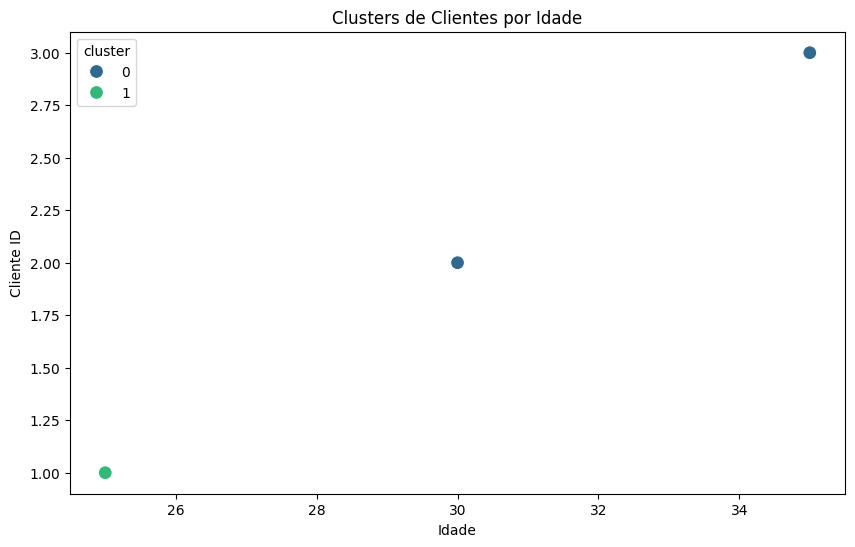

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=clientes, x='idade', y='cliente_id', hue='cluster', palette='viridis', s=100)
plt.title('Clusters de Clientes por Idade')
plt.xlabel('Idade')
plt.ylabel('Cliente ID')
plt.show()
